In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from random import seed, shuffle, uniform
from math import ceil, sqrt
from functools import reduce
import os

# if running just for output don't halt to show plots
# plots will be saved in images folder
if __name__ == '__main__':
    no_interact = True

IMG_FOLDER = "images/"
if not os.path.exists(IMG_FOLDER):
    os.makedirs(IMG_FOLDER)


# Theory question 1

In [22]:
X = np.matrix('1 -2; 1 -5; 1 -3; 1 0; 1 -8; 1 -2; 1 1; 1 5; 1 -1; 1 6')
Y = np.matrix(' 1; -4;  1;  3; 11;  5;  0; -1; -3;  1')

# Theta[0] = Theta_0 (bias)
Theta = np.linalg.inv(X.T@(X))@X.T@Y
print("Slope: {} Intercept: {}".format(Theta.item(1), Theta.item(0)))

regression = LinearRegression().fit(X,Y)
print("Slope: {} Intercept: {}".format(regression.coef_[0][1], regression.intercept_[0]))


Slope: -0.41267868241143574 Intercept: 1.0285891858297078
Slope: -0.4126786824114356 Intercept: 1.0285891858297078
[[0.10503418 0.00559354]
 [0.00559354 0.00621504]]


# Theory question 2

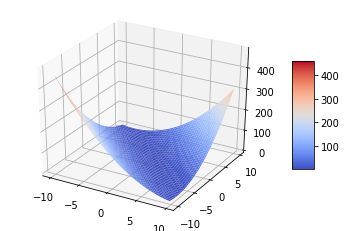

In [26]:
fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(-10, 10, .25)
Y = np.arange(-10, 10, .25)
X, Y = np.meshgrid(X,Y)
Z = (X + Y - 2)**2
surf = ax.plot_surface(X,Y,Z, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.savefig(IMG_FOLDER + "Theory-3D-plot.png")
if(not no_interact):
    plt.show()

# Closed From Linear Regression

In [29]:
seed(0)
data = []
with open("x06Simple.csv", 'r') as f:
    f.readline()
    for line in f.readlines():
        data.append(np.matrix(line[line.find(",")+1:]))
shuffle(data)
split_location = ceil(len(data)*2/3)
training_data = data[0:split_location]
test_data = data[split_location:]

training_data = reduce(lambda m,n : np.append(m,n,axis=0), training_data)
training_x_nonstandard = training_data[:,0:2]
training_y = training_data[:, 2:3]
test_data = reduce(lambda m,n : np.append(m,n,axis=0), test_data)

# standardize the data
test_x_nonstandard = test_data[:,0:2]
test_x_mean = np.mean(test_x_nonstandard, axis=0)
test_x_std  = np.std(test_x_nonstandard, axis=0)
test_x = (test_x_nonstandard-test_x_mean)/test_x_std
training_x = (training_x_nonstandard - test_x_mean)/test_x_std

test_y = test_data[:, 2:3]

#add bias term to our training data
X = np.insert(training_x, 0, 1,axis=1)
Theta = np.linalg.inv(X.T@(X))@X.T@training_y

#add bias term to test data
X = np.insert(test_x, 0, 1,axis=1)
diff = test_y - X@Theta
rmse = sqrt((diff.T@diff)/len(diff))

print("Theta_0: {}\nTheta_1: {}\nTheta_2: {}\nRMSE:    {}".format(Theta.item(0),Theta.item(1), Theta.item(2),rmse))

Theta_0: 3204.806992651019
Theta_1: 1154.1436875683478
Theta_2: -211.26304569659447
RMSE:    537.5342042992406


# Locally-Weighted Linear Regression

In [14]:
# set seed
seed(0)

# read data
data = []
with open("x06Simple.csv", 'r') as f:
    f.readline()
    for line in f.readlines():
        data.append(np.matrix(line[line.find(",")+1:]))
# Shuffle data
shuffle(data)
# split data 2/3 training 1/3 testing
split_location = ceil(len(data)*2/3)
training_data = data[0:split_location]
test_data = data[split_location:]

training_data = reduce(lambda m,n : np.append(m,n,axis=0), training_data)
training_x_nonstandard = training_data[:,0:2]
training_y = training_data[:, 2:3]
test_data = reduce(lambda m,n : np.append(m,n,axis=0), test_data)

# standardize the data
test_x_nonstandard = test_data[:,0:2]
test_x_mean = np.mean(test_x_nonstandard, axis=0)
test_x_std  = np.std(test_x_nonstandard, axis=0, ddof=1)
test_x = (test_x_nonstandard-test_x_mean)/test_x_std
training_x = (training_x_nonstandard - test_x_mean)/test_x_std

test_y = test_data[:, 2:3]

mse_sum = 0
# k value for similarity function
k=1

#add bias term to data
X_train = np.insert(training_x, 0, 1,axis=1)
X_test = np.insert(test_x, 0, 1,axis=1)

for i in range(np.shape(test_y)[0]):
    distance = np.sum(np.abs(X_test[i] - X_train), axis=1)
    weights = np.exp(-distance/np.power(k,2))
    w = np.zeros((np.shape(weights)[0], np.shape(weights)[0]))
    np.fill_diagonal(w, weights)
    Theta = (X_train.T@w@X_train).I@X_train.T@w@training_y
    diff = test_y - X_test@Theta
    mse_sum += (diff.T@diff)/np.shape(test_y)[0]
print("RMSE: {}:".format(np.sqrt(mse_sum)))    


RMSE: [[2367.61734914]]:


# Gradient Descent

Iterations: 26
Theta_0: 3204.806815411107
Theta_1: 1197.7113127771731
Theta_2: -219.23799591448335
Final RMSE: 537.5342665330295


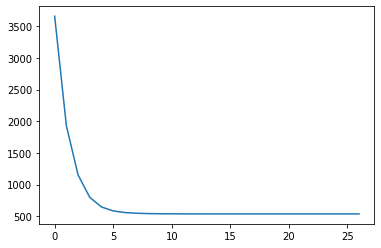

In [27]:
# set seed
seed(0)

# read data
data = []
with open("x06Simple.csv", 'r') as f:
    f.readline()
    for line in f.readlines():
        data.append(np.matrix(line[line.find(",")+1:]))
# Shuffle data
shuffle(data)
# split data 2/3 training 1/3 testing
split_location = ceil(len(data)*2/3)
training_data = data[0:split_location]
test_data = data[split_location:]

training_data = reduce(lambda m,n : np.append(m,n,axis=0), training_data)
training_x_nonstandard = training_data[:,0:2]
training_y = training_data[:, 2:3]
test_data = reduce(lambda m,n : np.append(m,n,axis=0), test_data)

# standardize the data
test_x_nonstandard = test_data[:,0:2]
test_x_mean = np.mean(test_x_nonstandard, axis=0)
test_x_std  = np.std(test_x_nonstandard, axis=0, ddof=1)
test_x = (test_x_nonstandard-test_x_mean)/test_x_std
training_x = (training_x_nonstandard - test_x_mean)/test_x_std

test_y = test_data[:, 2:3]

#add bias term to data
X_train = np.insert(training_x, 0, 1,axis=1)
X_test = np.insert(test_x, 0, 1,axis=1)

# Initialize theta to random numbers between [-1,1]
Theta = np.matrix([uniform(-1,1) for i in range(np.shape(X_train)[1])]).T
rmse = []
learning_rate = .01
for i in range(1000):
    #compute root mean squared error
    diff = test_y - X_test@Theta
    rmse.append(np.sqrt((diff.T@diff)/np.shape(test_y)[0]).item(0))
    
    # If the abosulte value of the percentage change in the RMSE
    # on the training data is less than 2^-23
    # skip the first iteration's check
    if(i > 0 and np.abs(rmse[i] - rmse[i-1])/rmse[i-1] < 2**-23):
        break
    
    # Compute the gradient (partial J)/(partial theta)
    dj_dt = 2*X_train.T@(X_train@Theta - training_y)
    
    Theta -= learning_rate*dj_dt
print("Iterations: {}".format(i))
print("Theta_0: {}\nTheta_1: {}\nTheta_2: {}".format(Theta.item(0),Theta.item(1), Theta.item(2)))
print("Final RMSE: {}".format(rmse[-1]))
fig = plt.figure()
plt.plot(range(len(rmse)), rmse)

plt.savefig(IMG_FOLDER + "Q4-RMSE-vs-Iterations.png")
if(not no_interact):
    plt.show()
